In [64]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
from DMS2_utils import *
from DMS2_fetch_protocol_data import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# ANIMAL_IDS = ["R610", "R611", "R612", "R613", "R614"]
# ANIMAL_ID = "R611"
# SESSION = 911940
# bdata = dj.create_virtual_module("bdata", "bdata")

In [65]:
df = fetch_latest_training_data()

fetched 4 sessions for R610 between 2023-04-13 and 2023-04-17
fetched 4 sessions for R611 between 2023-04-13 and 2023-04-17
fetched 4 sessions for R612 between 2023-04-13 and 2023-04-17
fetched 4 sessions for R613 between 2023-04-13 and 2023-04-17
fetched 4 sessions for R614 between 2023-04-13 and 2023-04-17


In [66]:
make_daily_stage_plots(df, overwrite=True)

plotting spoke plot R610 on 2023-04-13
plotting spoke plot R611 on 2023-04-13
plotting spoke plot R612 on 2023-04-13
plotting spoke plot R613 on 2023-04-13
plotting spoke plot R614 on 2023-04-13
plotting spoke plot R610 on 2023-04-15
plotting spoke plot R611 on 2023-04-15
plotting spoke plot R612 on 2023-04-15
plotting spoke plot R613 on 2023-04-15
plotting spoke plot R614 on 2023-04-15
plotting spoke plot R610 on 2023-04-16
plotting spoke plot R611 on 2023-04-16
plotting spoke plot R612 on 2023-04-16
plotting spoke plot R613 on 2023-04-16
plotting spoke plot R614 on 2023-04-16
plotting stage 3 plot R610 on 2023-04-17
plotting stage 3 plot R611 on 2023-04-17
plotting spoke plot R612 on 2023-04-17
plotting spoke plot R613 on 2023-04-17
plotting spoke plot R614 on 2023-04-17


## Figures in progress below

In [23]:
for (date, animal_id), sub_df in df.groupby(['date','animal_id']):
    None

In [9]:
date

datetime.date(2023, 4, 17)

In [13]:
animal_id = 'R610'
sub_df = df.query("animal_id == 'R610' & date == @date")

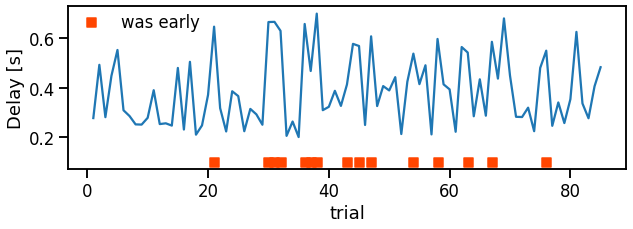

In [14]:
fig,ax = plt.subplots(figsize=(10,3))

plot_daily_delay_dur(sub_df, ax)

In [8]:
from DMS2_utils import make_daily_stage_plots

In [9]:
make_daily_stage_plots(df, overwrite=True)

called for R610 on 2023-04-17 but not doing anything!
plotting stage 3 plot R610 on 2023-04-17
called for R611 on 2023-04-17 but not doing anything!
plotting stage 3 plot R611 on 2023-04-17


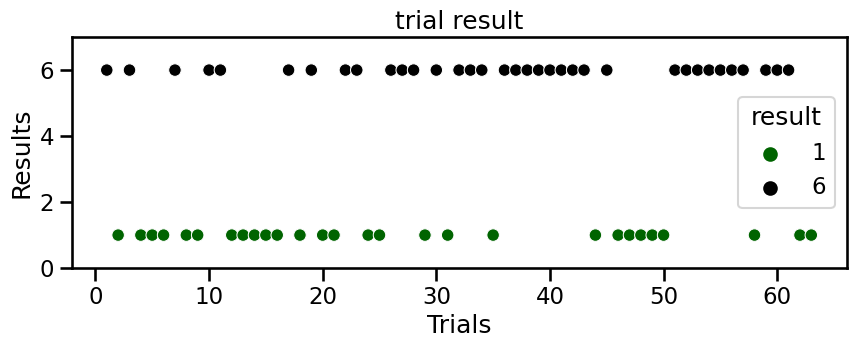

In [57]:
fig,ax = plt.subplots(figsize=(10,3))
plot_daily_results(sub_df,ax=ax, title="trial result")


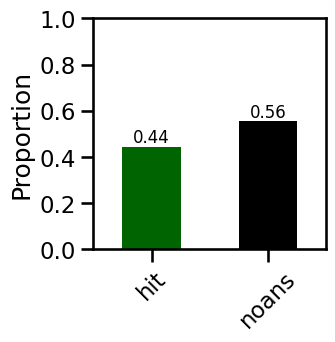

In [63]:
fig,ax = plt.subplots(figsize=(3,3))
plot_daily_result_summary(sub_df, ax=ax)

In [ ]:
get_result_labels(df.result)

In [48]:
result_column = sub_df.result
results = result_column.sort_values().unique()
labels = [RESULT_MAP[res]["label"] for res in results]

In [49]:
results, labels

(<IntegerArray>
 [1, 6]
 Length: 2, dtype: Int64,
 ['hit', 'noans'])

In [35]:
sub_df.result.value_counts(normalize=True).sort_index(ascending=True)

1    0.444444
6    0.555556
Name: result, dtype: float64

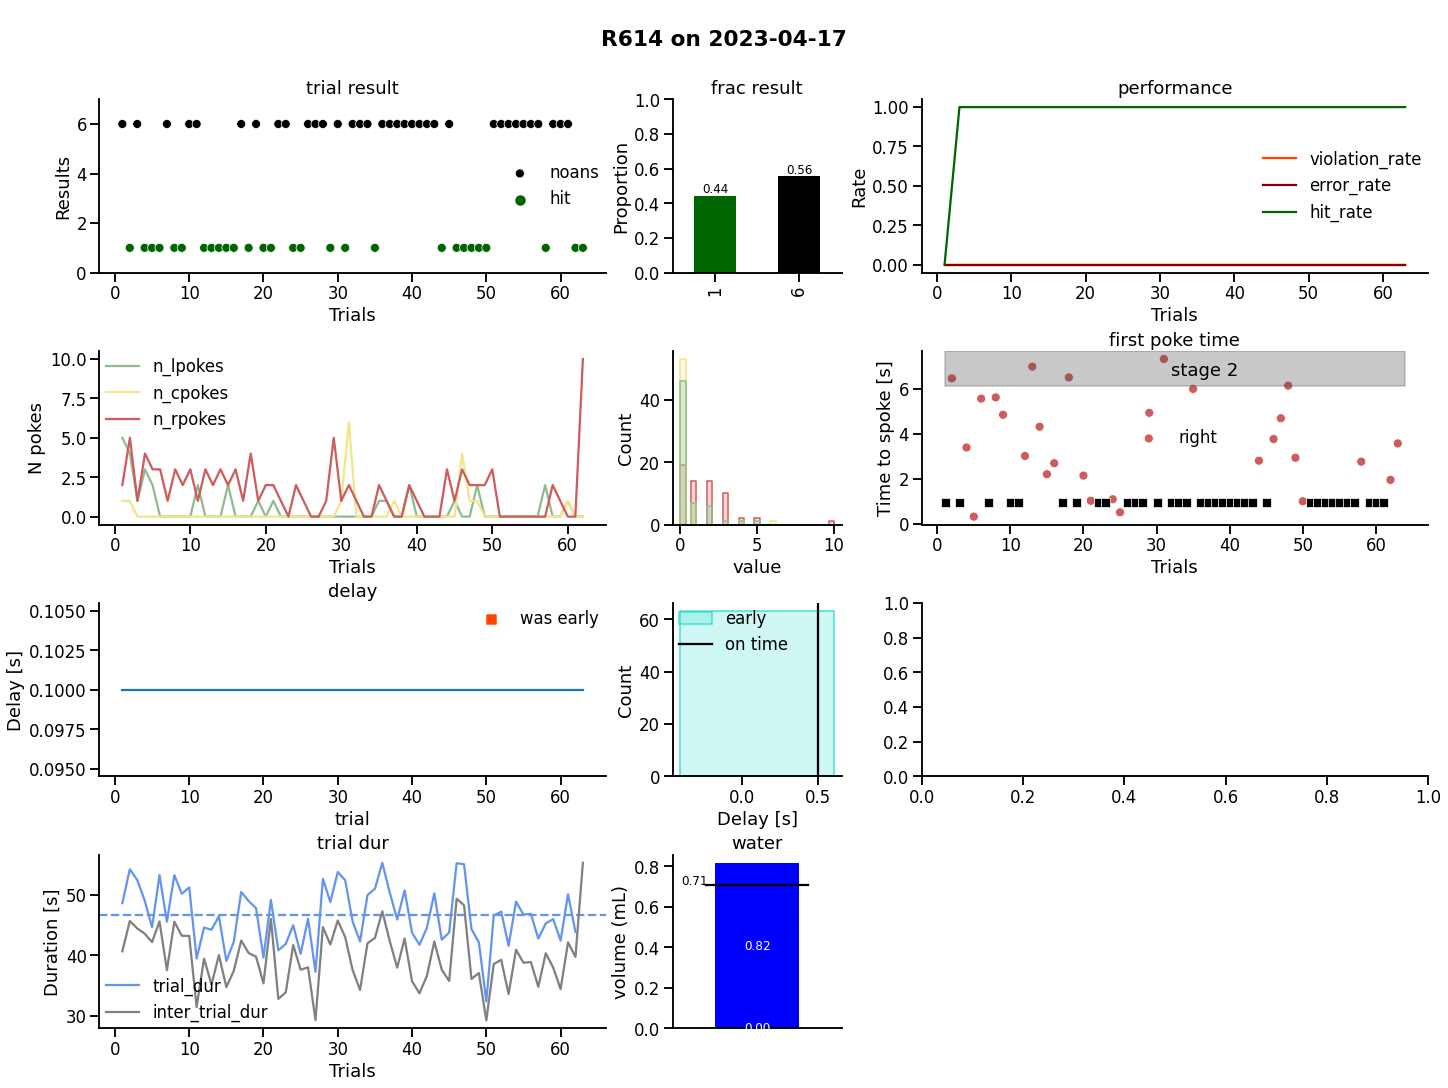

In [35]:
layout= """
    AAABCCC
    DDDEFFF
    GGGHIII
    JJJK...
"""
fig = plt.figure(constrained_layout=True,figsize=(20,15))

plt.suptitle(f"\n{animal_id} on {date}\n", fontweight="semibold")
ax_dict = fig.subplot_mosaic(layout) #ax to plot to
# identify_axes(ax_dict) # prints the letter for id

## ROW 1
plot_daily_results(sub_df,ax=ax_dict['A'], title="trial result")
plot_daily_result_summary(sub_df, ax=ax_dict['B'], title="frac result")
plot_daily_perfs(sub_df, ax_dict['C'], title="performance")

## ROW 2
plot_daily_npokes(sub_df,ax_dict['D'], plot_stage_info=False)
plot_pokes_hist(sub_df, ax_dict['E'], title="pokes summary")
plot_daily_first_spoke(sub_df, ax_dict['F'], title="first poke time",plot_stage_info=True)

## ROW 3
plot_daily_delay_dur(sub_df, ax_dict['G'], title="delay")
plot_delay_early_spoke_hist(sub_df, ax_dict['H'])
# VIOL/GO plot

# ROW 4
plot_daily_trial_dur(sub_df, ax_dict['J'], title="trial dur")
plot_daily_water(sub_df, ax_dict['K'], title= "water")

    

In [212]:
make_daily_spoke_stage_plot(df, overwrite=True)

plotting for R610
plotting for R611
plotting for R612
plotting for R613
plotting for R614


R610_2023-04-13_daily_spoke_stage.png
plotting for R610
R611_2023-04-13_daily_spoke_stage.png
plotting for R611
R612_2023-04-13_daily_spoke_stage.png
plotting for R612
R613_2023-04-13_daily_spoke_stage.png
plotting for R613
R614_2023-04-13_daily_spoke_stage.png
plotting for R614


<AxesSubplot:label='D', xlabel='value', ylabel='Count'>

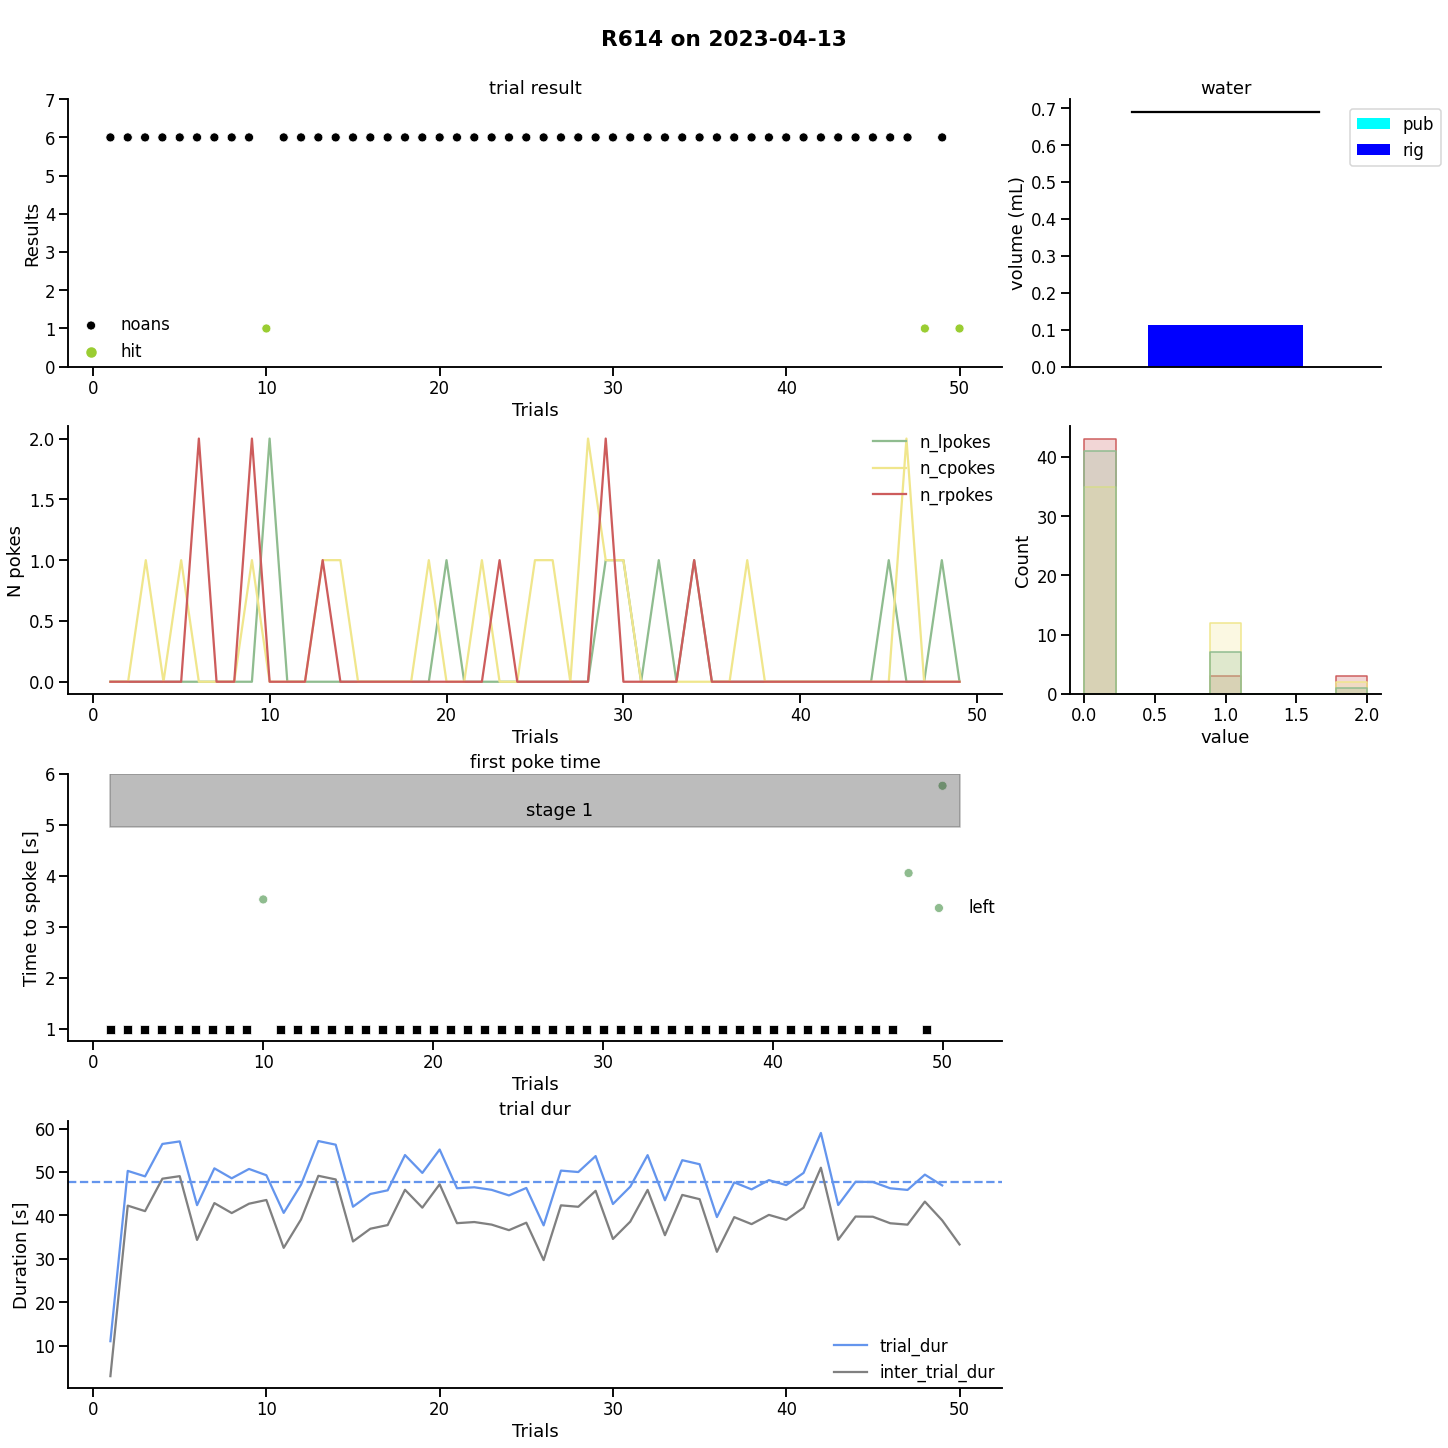

In [187]:

layout="""
    AAAB
    CCCD
    EEE.
    FFF.
    """
fig = plt.figure(constrained_layout=True,figsize=(20,20))
plt.suptitle(f"\n{animal_id} on {sub_df.date[0]}\n", fontweight="semibold")
ax_dict = fig.subplot_mosaic(layout) #ax to plot to
# identify_axes(ax_dict) # prints the letter for id

plot_daily_results(sub_df,ax=ax_dict['A'], title="trial result")
plot_daily_water(sub_df, ax_dict['B'], title= "water")
plot_daily_npokes(sub_df,ax_dict['C'], plot_stage_info=False)
plot_daily_first_spoke(sub_df, ax_dict['E'], title="first poke time",plot_stage_info=True)
plot_daily_trial_dur(sub_df, ax_dict['F'], title="trial dur")


sns.histplot(data=pokes_df, x="value",
        palette=["darkseagreen", "khaki", "indianred"],
        hue="variable",
        element="step", ax=ax_dict['D'], legend=False)



In [83]:
date_max = "2030-01-01" # hopefully i'll be graduated by then
date_max="2023-04-10"
date_min = "2023-01-02"

date_min_str = f"sessiondate >= '{date_min}'"
date_max_str = f"sessiondate <= '{date_max}'"

In [85]:
subject_session_key = {"ratname": "R501"}
protocol_blobs = (bdata.Sessions & subject_session_key & date_min_str & date_max_str).fetch(
    "protocol_data", as_dict=True
)

len(protocol_blobs)

90